# Check July HQTA data

Are `hqta_points` falling in the forest?

At a glance, it seems ok?

In [1]:
import geopandas as gpd
import pandas as pd

from utilities import GCS_FILE_PATH

/opt/conda/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
july_points = gpd.read_parquet(f"{GCS_FILE_PATH}hqta_points.parquet")
july_areas = gpd.read_parquet(f"{GCS_FILE_PATH}hqta_areas.parquet")

june_points = gpd.read_parquet("./june_ca_hq_transit_stops.parquet")
june_areas = gpd.read_parquet("./june_ca_hq_transit_areas.parquet")

hqta_types = july_points.hqta_type.unique().tolist()
hqta_details = july_points.hqta_details.unique().tolist()

In [3]:
def plot_by_group(gdf_after, gdf_before, category_list: list, col: str, figsize=(5, 5)):
    for i in category_list:
        subset1 = gdf_after[gdf_after[col]==i]
        subset2 = gdf_before[gdf_before[col]==i]
        
        if len(subset1) > 0:
            m1= subset1.plot(column="calitp_itp_id_primary", figsize=figsize, cmap="cividis")
            m1.set_title(f"july: {i}")
            print(m1)
        if len(subset2) > 0:
            m2 = subset2.plot(column="calitp_itp_id_primary", figsize=figsize, cmap="viridis")
            m2.set_title(f"june: {i}")
            print(m2)

AxesSubplot(0.284927,0.11;0.455147x0.77)
AxesSubplot(0.287622,0.11;0.449757x0.77)
AxesSubplot(0.125,0.335018;0.775x0.319964)
AxesSubplot(0.172234,0.11;0.680532x0.77)
AxesSubplot(0.284774,0.11;0.455451x0.77)
AxesSubplot(0.216834,0.11;0.591332x0.77)
AxesSubplot(0.221897,0.11;0.581206x0.77)
AxesSubplot(0.221897,0.11;0.581206x0.77)
AxesSubplot(0.201887,0.11;0.621226x0.77)
AxesSubplot(0.201887,0.11;0.621226x0.77)


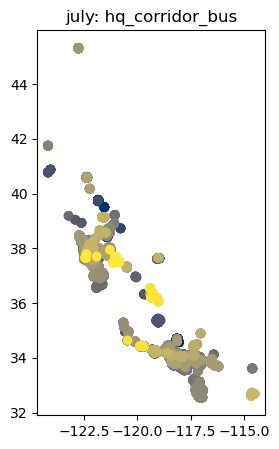

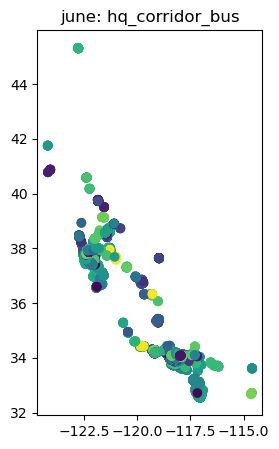

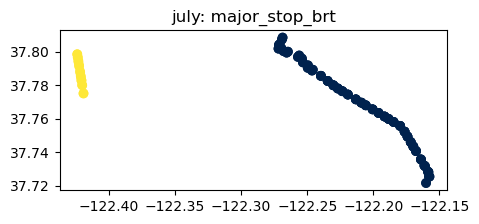

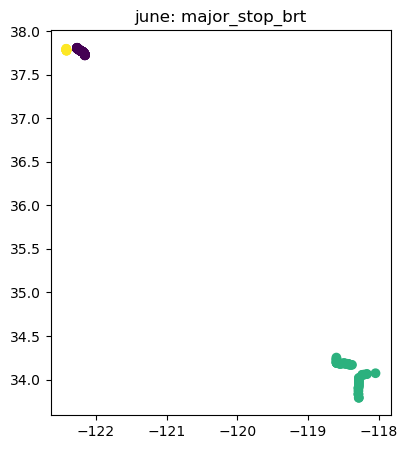

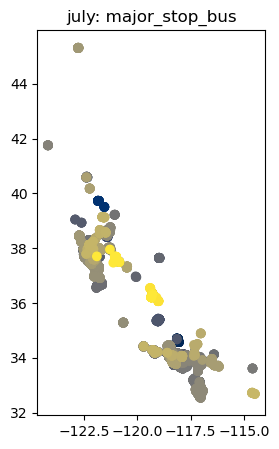

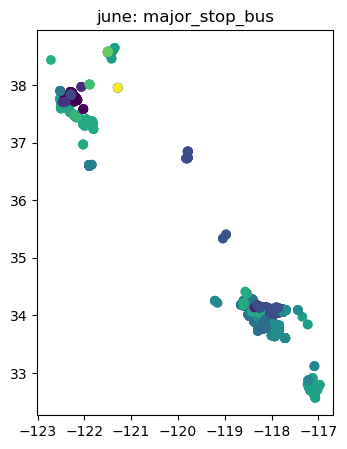

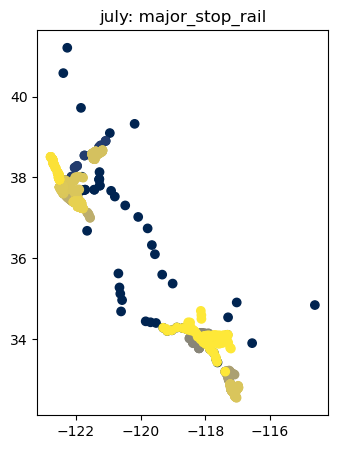

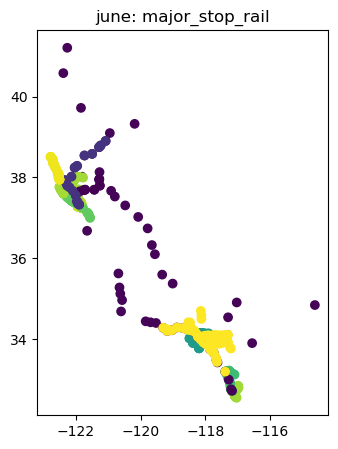

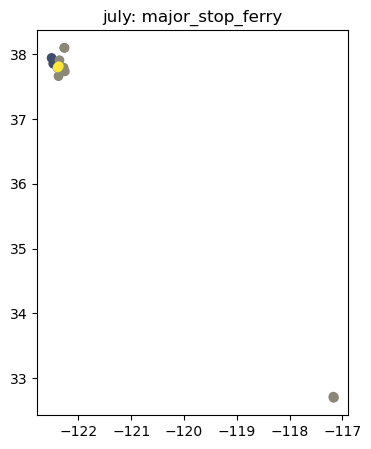

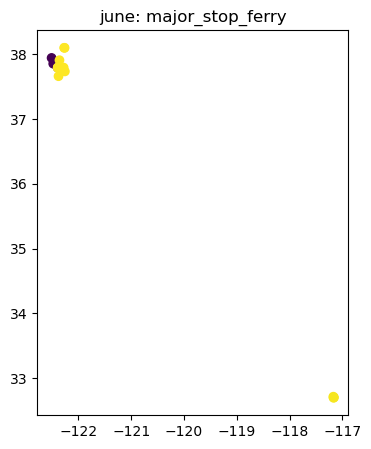

In [4]:
plot_by_group(july_points, june_points, hqta_types, "hqta_type", figsize=(5, 5))

AxesSubplot(0.284761,0.11;0.455478x0.77)
AxesSubplot(0.287434,0.11;0.450133x0.77)
AxesSubplot(0.125,0.320373;0.775x0.349255)
AxesSubplot(0.172074,0.11;0.680853x0.77)
AxesSubplot(0.284607,0.11;0.455785x0.77)
AxesSubplot(0.216623,0.11;0.591754x0.77)
AxesSubplot(0.221743,0.11;0.581514x0.77)
AxesSubplot(0.221743,0.11;0.581514x0.77)
AxesSubplot(0.201691,0.11;0.621618x0.77)
AxesSubplot(0.201691,0.11;0.621618x0.77)


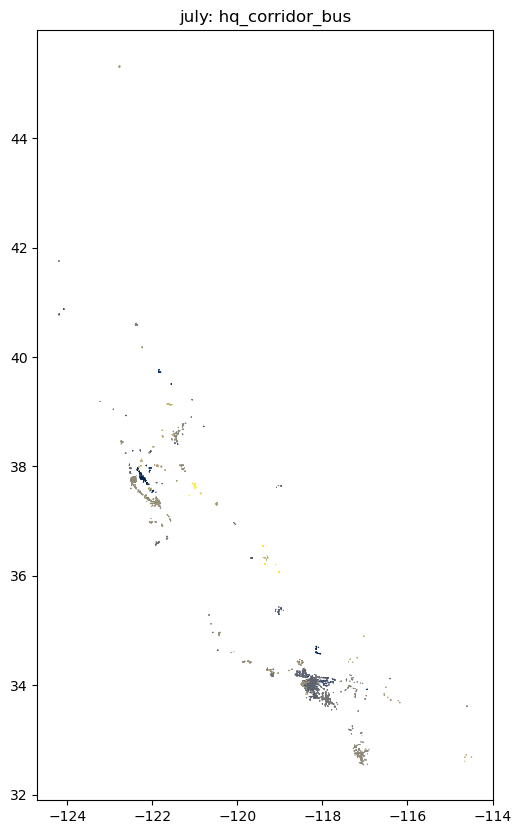

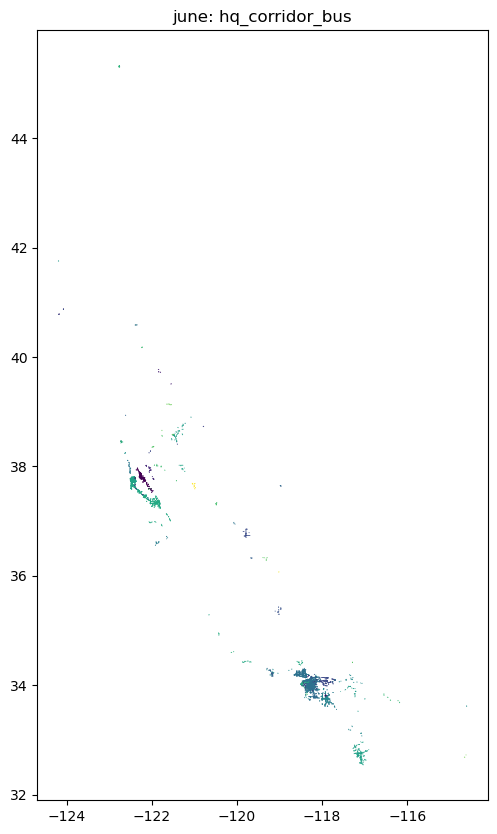

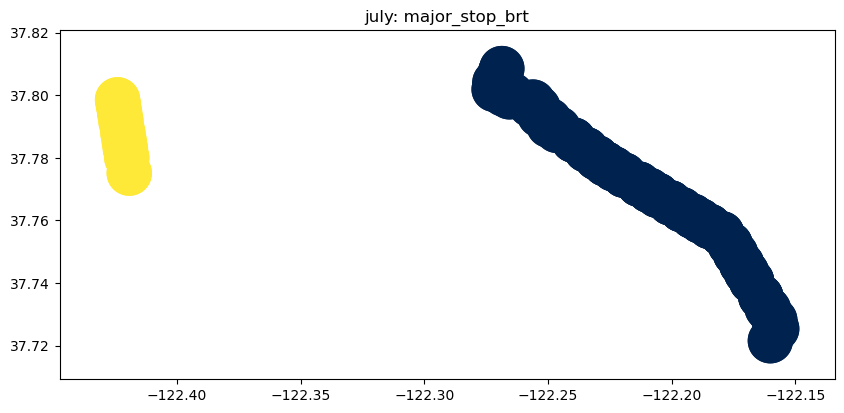

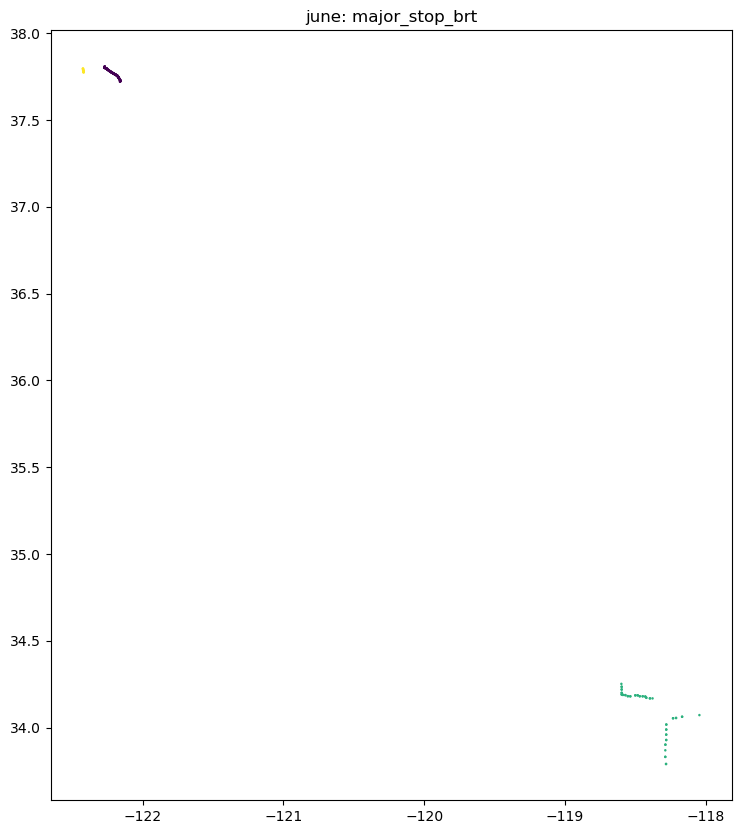

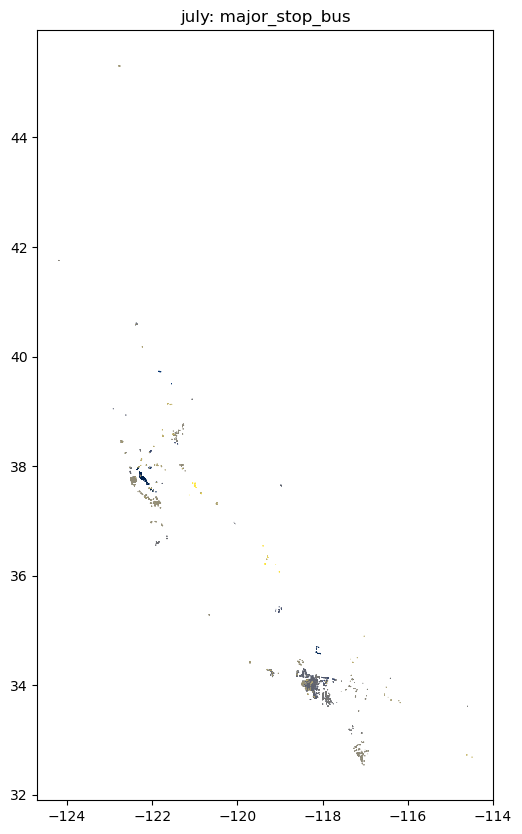

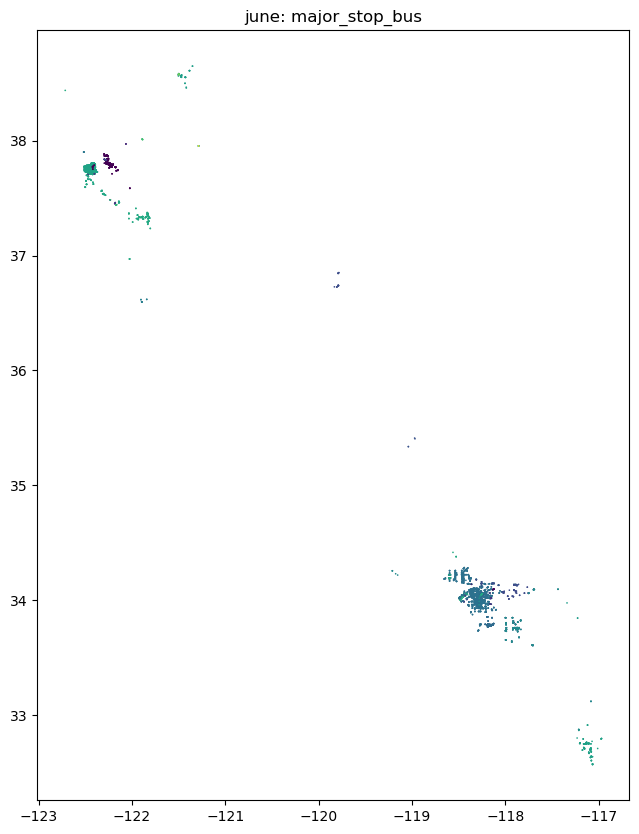

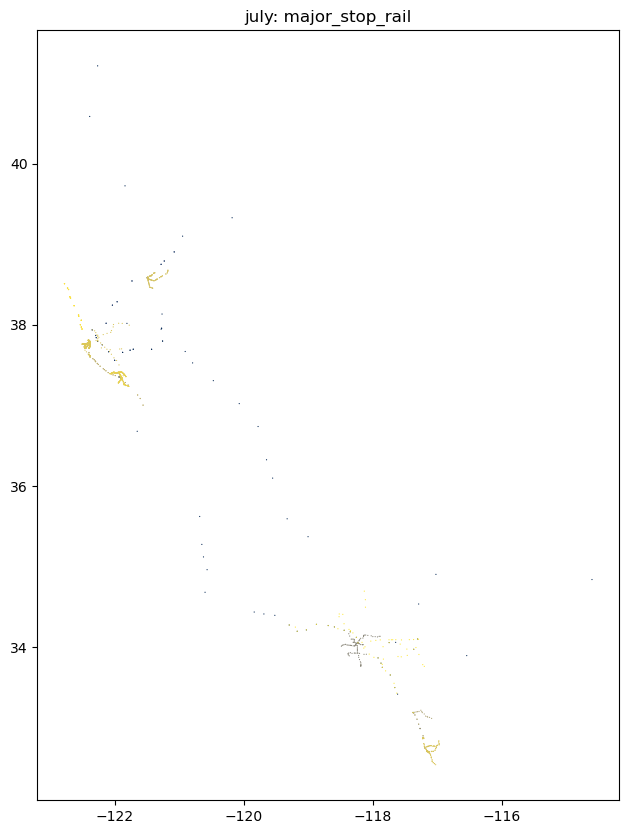

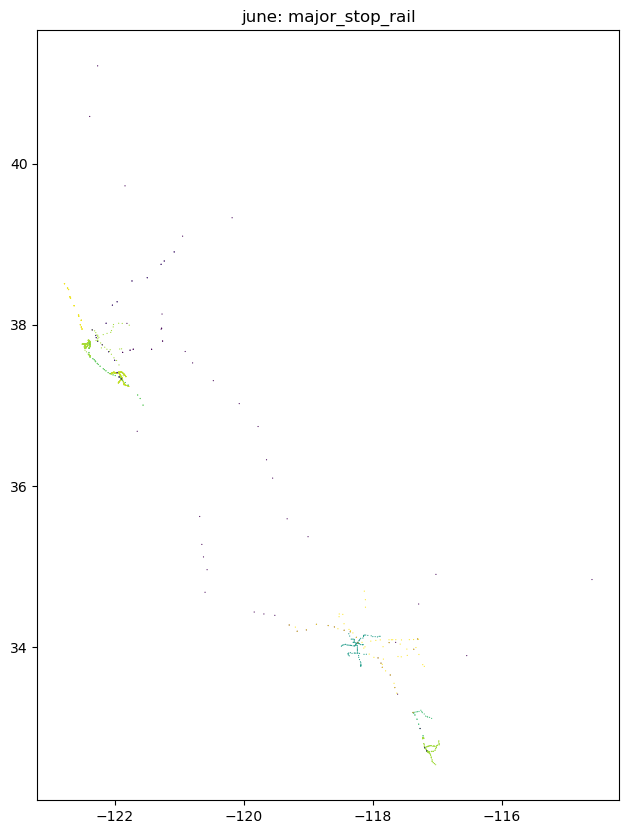

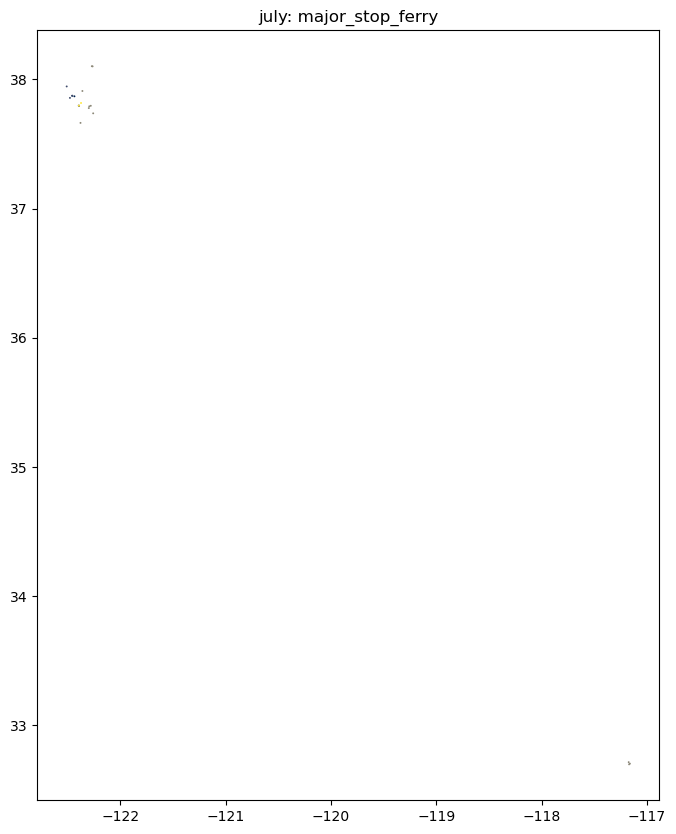

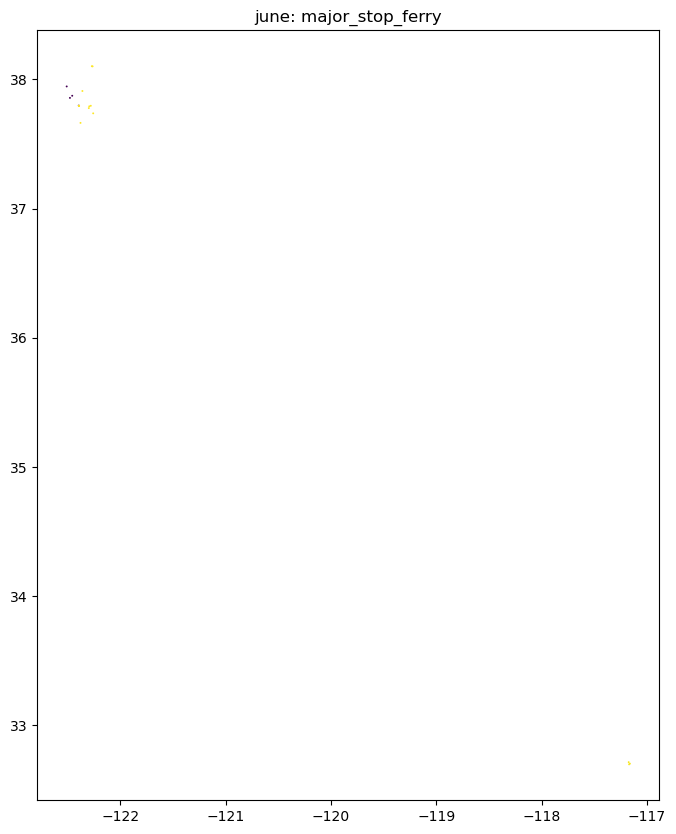

In [5]:
plot_by_group(july_areas, june_areas, hqta_types, "hqta_type", figsize=(10, 10))

AxesSubplot(0.125,0.125711;0.775x0.738579)
AxesSubplot(0.125,0.130095;0.775x0.729811)
AxesSubplot(0.129444,0.11;0.766112x0.77)
AxesSubplot(0.125,0.121409;0.775x0.747181)
AxesSubplot(0.125,0.15722;0.775x0.675561)
AxesSubplot(0.125,0.18087;0.775x0.628259)
AxesSubplot(0.125,0.18087;0.775x0.628259)


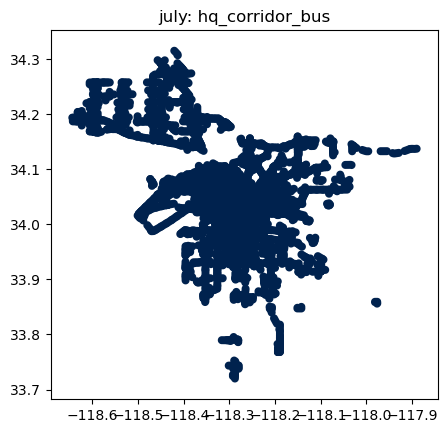

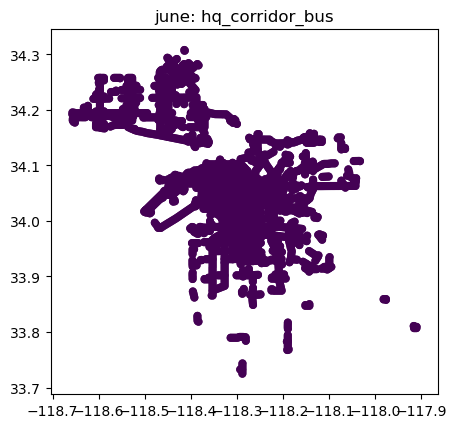

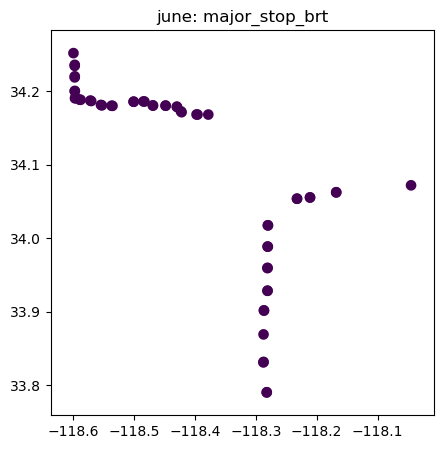

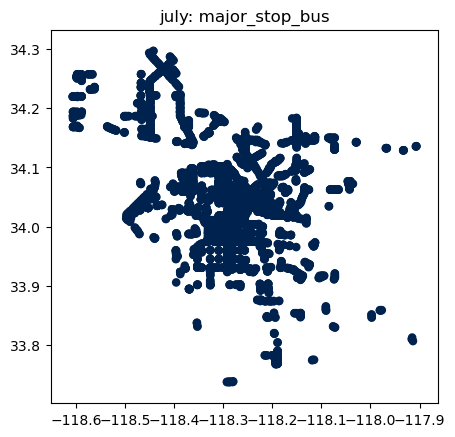

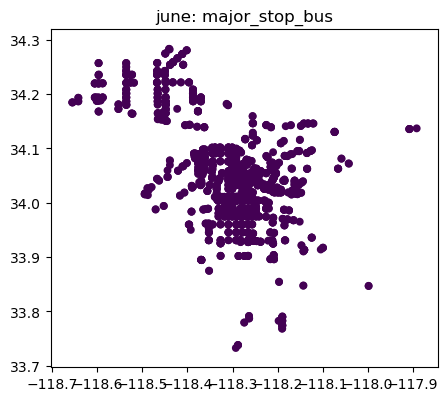

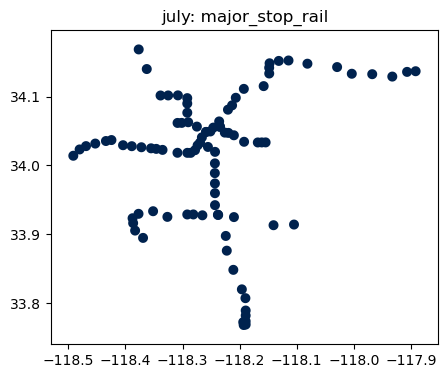

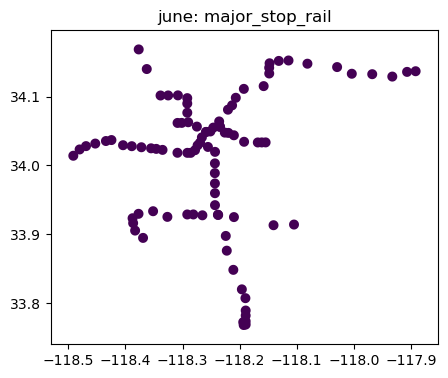

In [6]:
plot_by_group(july_areas[july_areas.calitp_itp_id_primary==182], 
              june_areas[june_areas.calitp_itp_id_primary==182], 
              hqta_types, "hqta_type", figsize=(5, 5))

In [7]:
# Download the geojsons and read in locally, save as parquet to check in
from calitp.storage import get_fs
import fsspec
fs = get_fs()

GCS_PATH = "gs://data-analyses/high_quality_transit_areas/export/2022-06-15/"

#filename = "ca_hq_transit_stops"
#object_path = fs.open(f"{GCS_PATH}ca_hq_transit_stops.geojson")
#gdf = gpd.read_file(object_path)
#june_points = gpd.read_file("./ca_hq_transit_stops.geojson")

In [8]:
#june_points = gpd.read_file("./ca_hq_transit_stops.geojson")
#june_areas = gpd.read_file(f"./ca_hq_transit_areas.geojson")

#june_points.to_parquet("./june_ca_hq_transit_stops.parquet")
#june_areas.to_parquet("./june_ca_hq_transit_areas.parquet")

#hq_points.explore(column="hqta_details", cmap="viridis")
#hq_areas.explore(column="hqta_details", cmap="viridis")